In [7]:
# Test API script from CoinMarketCap API documentation

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e87d1a62-53f8-4247-8f6f-98c1294033a6',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-01-16T16:44:11.531Z', 'error_code': 0, 'error_message': None, 'elapsed': 31, 'credit_count': 1, 'notice': None, 'total_count': 8872}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9932, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [3]:
type(data)

dict

In [4]:
import pandas as pd

pd.json_normalize(data)

,data,status.timestamp,status.error_code,status.error_message,status.elapsed,status.credit_count,status.notice,status.total_count
0,"[{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC',...",2023-01-16T16:40:14.167Z,0,None,24,1,None,8872


In [6]:
# normalize JSON to dataframe format
df = pd.json_normalize(data['data'])

# Add timestamp of when value is extracted
df['timestamp'] = pd.to_datetime('now', utc = True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9932,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.926406e+07,1.926406e+07,...,41.1756,4.404296e+11,None,2023-01-16T16:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-16 16:41:45.720013+00:00
1,1027,Ethereum,ETH,ethereum,6361,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,...,19.3270,1.896773e+11,None,2023-01-16T16:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-16 16:41:45.720013+00:00
2,825,Tether,USDT,tether,46159,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.635539e+10,7.314177e+10,...,6.7636,7.315307e+10,None,2023-01-16T16:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-16 16:41:45.720013+00:00
3,1839,BNB,BNB,bnb,1169,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.599619e+08,1.599800e+08,...,4.8507,5.950939e+10,None,2023-01-16T16:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-16 16:41:45.720013+00:00
4,3408,USD Coin,USDC,usd-coin,9553,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.384671e+10,4.384671e+10,...,4.4675,4.384417e+10,None,2023-01-16T16:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-16 16:41:45.720013+00:00
5,52,XRP,XRP,xrp,875,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.071332e+10,9.998916e+10,...,1.9921,3.855211e+10,None,2023-01-16T16:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-16 16:41:45.720013+00:00
6,4687,Binance USD,BUSD,binance-usd,6025,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.629947e+10,1.629947e+10,...,1.6612,1.630011e+10,None,2023-01-16T16:38:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-01-16 16:41:45.720013+00:00
7,2010,Cardano,ADA,cardano,636,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.451835e+10,3.530394e+10,...,1.2220,1.563142e+10,None,2023-01-16T16:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-16 16:41:45.720013+00:00
8,74,Dogecoin,DOGE,dogecoin,634,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,...,1.1289,1.107691e+10,None,2023-01-16T16:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-16 16:41:45.720013+00:00
9,3890,Polygon,MATIC,polygon,571,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, scaling, stat...",1.000000e+10,8.734317e+09,1.000000e+10,...,0.8850,9.941662e+09,None,2023-01-16T16:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-16 16:41:45.720013+00:00


In [8]:
# Creating function that gets the top 15 cryptocurrencies from CoinMarketCap with developer API key

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'e87d1a62-53f8-4247-8f6f-98c1294033a6',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now', utc = True)
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])
 
    # Create csv file from the pandas dataframe
    if not os.path.isfile(r'C:\Users\joon6\OneDrive\Desktop\Covid Project\API\API_call.csv'):
        df.to_csv(r'C:\Users\joon6\OneDrive\Desktop\Covid Project\API\API_call.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\joon6\OneDrive\Desktop\Covid Project\API\API_call.csv', mode = 'a', header=False)    

In [7]:
# Loop api_runner function to 'automate' data extraction

import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('ÁPI Runner completed successfully')
    sleep(600) 
exit()



ÁPI Runner completed successfully
ÁPI Runner completed successfully
ÁPI Runner completed successfully
ÁPI Runner completed successfully
ÁPI Runner completed successfully
ÁPI Runner completed successfully
ÁPI Runner completed successfully


KeyboardInterrupt: 

In [8]:
# change data format of values with scientific notation to float format
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
df101 = pd.read_csv(r'C:\Users\joon6\OneDrive\Desktop\Covid Project\API\API_call.csv')
pd.options.display.max_columns = None
df101

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9930,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19262693.00000,19262693.00000,NaN,1,NaN,NaN,NaN,2023-01-15T07:35:00.000Z,20708.46386,28224198766.74847,-31.13430,-0.32663,-1.15092,22.14665,18.54326,22.80407,7.54898,398900781929.07642,41.08070,434877741160.63000,NaN,2023-01-15T07:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-15 07:37:12.012364+00:00
1,1,1027,Ethereum,ETH,ethereum,6358,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2023-01-15T07:35:00.000Z,1524.99849,9133799600.91783,-36.17490,-0.26541,-1.94207,20.65161,19.50081,22.13262,16.50448,186619961612.93411,19.22420,186619961612.92999,NaN,2023-01-15T07:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-15 07:37:12.012364+00:00
2,2,825,Tether,USDT,tether,46126,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,66355384993.16725,73141766321.23428,NaN,3,NaN,NaN,NaN,2023-01-15T07:35:00.000Z,1.00018,39729867516.92001,-22.85710,-0.00083,-0.00736,0.02869,0.01049,0.07892,0.01066,66367172624.90952,6.83220,73154759512.46001,NaN,2023-01-15T07:35:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-15 07:37:12.012364+00:00
3,3,1839,BNB,BNB,bnb,1167,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,159962142.68187,159979963.59043,NaN,4,NaN,NaN,NaN,2023-01-15T07:35:00.000Z,296.36364,753248247.31692,-20.55360,-0.75944,-5.17223,13.50205,12.46354,6.29146,9.13070,47406963349.64787,4.88040,59272728602.95000,NaN,2023-01-15T07:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-15 07:37:12.012364+00:00
4,4,3408,USD Coin,USDC,usd-coin,9540,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,43781858191.72518,43781858191.72518,NaN,5,NaN,NaN,NaN,2023-01-15T07:35:00.000Z,0.99996,3371669236.95092,-21.84110,-0.00018,-0.01850,-0.00223,-0.00874,-0.01168,-0.00444,43779896681.25275,4.50990,43779896681.25000,NaN,2023-01-15T07:35:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-15 07:37:12.012364+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,10,5426,Solana,SOL,solana,421,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,370620433.91299,538567520.06332,NaN,11,NaN,NaN,NaN,2023-01-16T08:55:00.000Z,23.13533,1716224069.97985,-27.05390,-4.71171,3.58988,42.91185,86.67368,62.41027,-24.75389,8574426033.60350,0.87780,12459937289.83000,NaN,2023-01-16T08:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-16 08:56:30.565524+00:00
1196,11,6636,Polkadot,DOT,polkadot-new,457,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1173108407.90368,1271637920.60886,NaN,12,904869778.00000,5226247987.24847,NaN,2023-01-16T08:55:00.000Z,5.77569,307013109.33341,-32.31400,-3.23035,-0.53219,17.69349,23.11991,1.78612,-6.79802,6775511354.99508,0.69360,7344587348.01000,NaN,2023-01-16T08:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-16 08:56:30.565524+00:00
1197,12,2,Litecoin,LTC,litecoin,869,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",84000000.00000,72065041.72115,84000000.00000,NaN,13,NaN,NaN,NaN,2

In [10]:
# Group data by cryptocurrency to see the percent change values per timeframe
df3 = df101.groupby('name',sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3 

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.37523,0.02984,22.11112,21.49332,24.49253,7.27549
Ethereum,-0.42963,-0.13215,19.88490,24.77700,25.29641,16.58987
Tether,-0.00009,0.00598,0.03189,0.01389,0.08491,0.01819
BNB,-0.60416,-2.04269,11.38009,19.26861,8.90504,9.38542
USD Coin,0.00321,-0.00799,-0.00797,-0.01138,-0.01332,-0.00868
XRP,-0.91366,-2.20793,12.72298,5.49539,0.94626,-17.68528
Binance USD,-0.00183,-0.01703,-0.02756,-0.02346,-0.03943,-0.01238
Cardano,-0.87668,-1.92760,17.59036,22.97676,4.27166,-5.45020
Dogecoin,-1.06005,-2.31821,15.69025,2.66052,-3.46832,42.45182


In [11]:
# use of stack function to represent the percent change trend in a more intuitive manner
df4 = df3.stack()
pd.options.display.max_rows = None
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.37523
             quote.USD.percent_change_24h     0.02984
             quote.USD.percent_change_7d     22.11112
             quote.USD.percent_change_30d    21.49332
             quote.USD.percent_change_60d    24.49253
             quote.USD.percent_change_90d     7.27549
Ethereum     quote.USD.percent_change_1h     -0.42963
             quote.USD.percent_change_24h    -0.13215
             quote.USD.percent_change_7d     19.88490
             quote.USD.percent_change_30d    24.77700
             quote.USD.percent_change_60d    25.29641
             quote.USD.percent_change_90d    16.58987
Tether       quote.USD.percent_change_1h     -0.00009
             quote.USD.percent_change_24h     0.00598
             quote.USD.percent_change_7d      0.03189
             quote.USD.percent_change_30d     0.01389
             quote.USD.percent_change_60d     0.08491
             quote.USD.percent_change_90

In [12]:
# The stacked data is in series data type. Therefore, needs conversion back to dataframe for further data analysis
df5 = df4.to_frame(name = 'values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.37523
            quote.USD.percent_change_24h   0.02984
            quote.USD.percent_change_7d   22.11112
            quote.USD.percent_change_30d  21.49332
            quote.USD.percent_change_60d  24.49253
            quote.USD.percent_change_90d   7.27549
Ethereum    quote.USD.percent_change_1h   -0.42963
            quote.USD.percent_change_24h  -0.13215
            quote.USD.percent_change_7d   19.88490
            quote.USD.percent_change_30d  24.77700
            quote.USD.percent_change_60d  25.29641
            quote.USD.percent_change_90d  16.58987
Tether      quote.USD.percent_change_1h   -0.00009
            quote.USD.percent_change_24h   0.00598
            quote.USD.percent_change_7d    0.03189
            quote.USD.percent_change_30d   0.01389
            quote.USD.percent_change_60d   0.08491
            quote.USD.percent_change_90d   0.01819
BNB         quote.USD.percent_change_1h   -0.60416
            quote.USD.percent_change_24h  -2.04269
            quote.USD.percent_change_7d   11.38009
            quote.USD.percent_change_30d  19.26861
            quote.USD.percent_change_60d   8.90504
            quote.USD.percent_change_90d   9.38542
USD Coin    quote.USD.percent_change_1h    0.00321
            quote.USD.percent_change_24h  -0.00799
            quote.USD.percent_change_7d   -0.00797
            quote.USD.percent_change_30d  -0.01138
            quote.USD.percent_change_60d  -0.01332
            quote.USD.percent_change_90d  -0.00868
XRP         quote.USD.percent_change_1h   -0.91366
            quote.USD.percent_change_24h  -2.20793
            quote.USD.percent_change_7d   12.72298
            quote.USD.percent_change_30d   5.49539
            quote.USD.percent_change_60d   0.94626
            quote.USD.percent_change_90d -17.68528
Binance USD quote.USD.percent_change_1h   -0.00183
            quote.USD.percent_change_24h  -0.01703
            quote.USD.percent_change_7d   -0.02756
            quote.USD.percent_change_30d  -0.02346
            quote.USD.percent_change_60d  -0.03943
            quote.USD.percent_change_90d  -0.01238
Cardano     quote.USD.percent_change_1h   -0.87668
            quote.USD.percent_change_24h  -1.92760
            quote.USD.percent_change_7d   17.59036
            quote.USD.percent_change_30d  22.97676
            quote.USD.percent_change_60d   4.27166
            quote.USD.percent_change_90d  -5.45020
Dogecoin    quote.USD.percent_change_1h   -1.06005
            quote.USD.percent_change_24h  -2.31821
            quote.USD.percent_change_7d   15.69025
            quote.USD.percent_change_30d   2.66052
            quote.USD.percent_change_60d  -3.46832
            quote.USD.percent_change_90d  42.45182
Polygon     quote.USD.percent_change_1h   -0.98603
            quote.USD.percent_change_24h  -0.55018
            quote.USD.percent_change_7d   18.95371
            quote.USD.percent_change_30d  15.30872
            quote.USD.percent_change_60d   7.22129
            quote.USD.percent_change_90d  17.57384
Solana      quote.USD.percent_change_1h   -2.06704
            quote.USD.percent_change_24h  -0.56974
            quote.USD.percent_change_7d   58.47759
            quote.USD.percent_change_30d  73.75959
            quote.USD.percent_change_60d  60.84958
            quote.USD.percent_change_90d -24.61045
Polkadot    quote.USD.percent_change_1h   -1.00016
            quote.USD.percent_change_24h  -2.70144
            quote.USD.percent_change_7d   23.32968
            quote.USD.percent_change_30d  17.77771
            quote.USD.percent_change_60d   0.73932
            quote.USD.percent_change_90d  -5.53234
Litecoin    quote.USD.percent_change_1h   -0.59744
            quote.USD.percent_change_24h  -2.18422
            quote.USD.percent_change_7d   10.25318
            quote.USD.percent_change_30d  24.70472
            quote.USD.percent_change_60d  45.22798
            quo

In [13]:
# Resetting dataframe index
df6 = df5.reset_index()
df6 = df6.rename(columns={'level_1' : 'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.37523
1,Bitcoin,quote.USD.percent_change_24h,0.02984
2,Bitcoin,quote.USD.percent_change_7d,22.11112
3,Bitcoin,quote.USD.percent_change_30d,21.49332
4,Bitcoin,quote.USD.percent_change_60d,24.49253
5,Bitcoin,quote.USD.percent_change_90d,7.27549
6,Ethereum,quote.USD.percent_change_1h,-0.42963
7,Ethereum,quote.USD.percent_change_24h,-0.13215
8,Ethereum,quote.USD.percent_change_7d,19.88490
9,Ethereum,quote.USD.percent_change_30d,24.77700


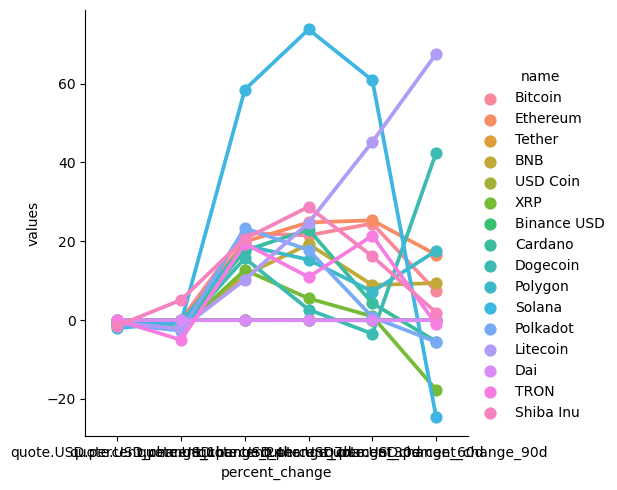

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# point plot of the percent change for each cryptocurrency. However, the axis values are too long
sns.catplot(data=df6, x='percent_change', y='values', hue='name', kind='point')
plt.show()

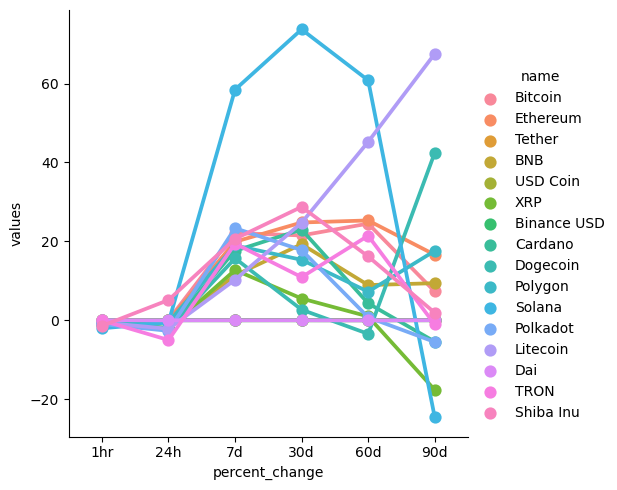

In [15]:
# Axis values are now readable
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1hr','24h','7d','30d','60d','90d'])
sns.catplot(data=df6, x='percent_change', y='values', hue='name', kind='point')
plt.show()

In [18]:
# grouped quoted price by Ethereum during the timeframe at which api_runner was running.

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Ethereum'")
df10 = df10.reset_index()
df10

,index,name,quote.USD.price,timestamp
0,1,Ethereum,1566.33016,2023-01-16 07:56:16.309746+00:00
1,1,Ethereum,1566.33016,2023-01-16 07:56:27.367689+00:00
2,1,Ethereum,1566.15558,2023-01-16 08:06:27.721367+00:00
3,1,Ethereum,1542.66678,2023-01-16 08:16:28.577631+00:00
4,1,Ethereum,1543.04014,2023-01-16 08:26:28.904593+00:00
5,1,Ethereum,1541.25599,2023-01-16 08:36:29.247578+00:00
6,1,Ethereum,1541.54117,2023-01-16 08:46:29.619494+00:00
7,1,Ethereum,1540.48203,2023-01-16 08:56:30.565524+00:00


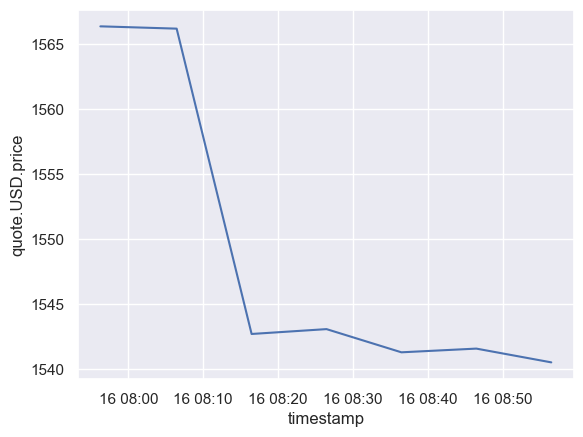

Percent difference between first and last price in given timeframe= -1.650235116778805 %


In [22]:
sns.set_theme(style="darkgrid")
sns.lineplot(data = df10, x = "timestamp", y="quote.USD.price")
plt.show()
first_price = df10['quote.USD.price'].iloc[0]
last_price = df10['quote.USD.price'].iloc[-1]
print("Percent difference between first and last price in given timeframe=", (last_price-first_price)/first_price*100,"%")